# Project 2: Digit Recognition

## Statistical Machine Learning (COMP90051), Semester 2, 2017

*Copyright the University of Melbourne, 2017*

### Submitted by:  Marc Tom Thorgersen
### Student number: 906200
### Kaggle-in-class username: trixxed

In this project, you will be applying machine learning for recognising digits from real world images. The project worksheet is a combination of text, pre-implemented code and placeholders where we expect you to add your code and answers. You code should produce desired result within a reasonable amount of time. Please follow the instructions carefully, **write your code and give answers only where specifically asked**. In addition to worksheet completion, you are also expected to participate **live competition with other students in the class**. The competition will be run using an on-line platform called Kaggle.

** Marking:** You can get up to 33 marks for Project 2. The sum of marks for Project 1 and Project 2 is then capped to 50 marks

**Due date:** Wednesday 11/Oct/17, 11:59pm AEST (LMS components); and Kaggle competition closes Monday 09/Oct/17, 11:59pm AEST.

**Late submissions** will incur a 10% penalty per calendar day

** Submission materials**
 - **Worksheet**: Fill in your code and answers within this IPython Notebook worksheet.
 - **Competition**: Follow the instructions provided in the corresponding section of this worksheet. Your competition submissions should be made via Kaggle website.
 - **Report**: The report about your competition entry should be submitted to the LMS as a PDF file (see format requirements in `2.2`).
 - **Code**: The source code behind your competition entry.
The **Worksheet**, **Report** and **Code** should be bundled into a `.zip` file (not 7z, rar, tar, etc) and submitted in the LMS. Marks will be deducted for submitting files in other formats, or we may elect not to mark them at all.

**Academic Misconduct:** Your submission should contain only your own work and ideas. Where asked to write code, you cannot re-use someone else's code, and should write your own implementation. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where inappropriate levels of collusion or plagiarism are deemed to have taken place.

**Table of Contents**

1. Handwritten Digit Recognition **(16 marks)**
  1. Linear Approach
  2. Basis Expansion
  3. Kernel Perceptron
  4. Dimensionality Reduction
  
2. Kaggle Competition **(17 marks)**
  1. Making Submissions
  2. Method Description

## 1. Handwritten Digit Recognition
Handwritten digit recognition can be framed as a classification task: given a bitmap image as input, predict the digit type (0, 1, ..., 9). The pixel values in each position of the image form our features, and the digit type is the class. We are going to use a dataset where the digits are represented as *28 x 28* bitmap images. Each pixel value ranges between 0 and 1, and represents the monochrome ink intensity at that position. Each image matrix has been flattened into one long feature vector, by concatenating each row of pixels.

In this part of the project, we will only use images of two digits, namely "7" and "9". As such, we will be working on a binary classification problem. *Throughout this first section, our solution is going to be based on the perceptron classifier.*

Start by setting up working environment, and loading the dataset. *Do not override variable `digits`, as this will be used throughout this section.*

In [1]:
%pylab inline

digits = np.loadtxt('digits_7_vs_9.csv', delimiter=' ')

Populating the interactive namespace from numpy and matplotlib


Take some time to explore the dataset. Note that each image of "7" is labeled as -1, and each image of "9" is labeled as +1.

[-1.]


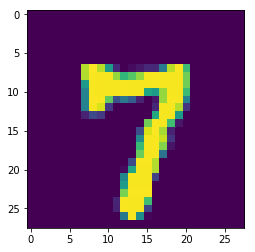

In [2]:
# extract a stack of 28x28 bitmaps
X = digits[:, 0:784]

# extract labels for each bitmap
y = digits[:, 784:785]

# display a single bitmap and print its label
bitmap_index = 0
plt.imshow(X[bitmap_index,:].reshape(28, 28), interpolation=None)
print(y[bitmap_index])


You can also display several bitmaps at once using the following code.

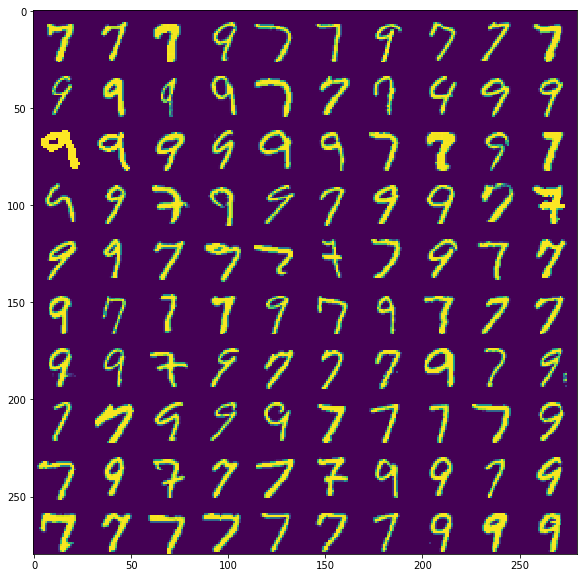

In [3]:
def gallery(array, ncols):
    nindex, height, width = array.shape
    nrows = nindex//ncols
    result = (array.reshape((nrows, ncols, height, width))
              .swapaxes(1,2)
              .reshape((height*nrows, width*ncols)))
    return result

ncols = 10
result = gallery(X.reshape((300, 28, 28))[:ncols**2], ncols)
plt.figure(figsize=(10,10))
plt.imshow(result, interpolation=None)

### 1.1 Linear Approach
We are going to use perceptron for our binary classification task. Recall that perceptron is a linear method. Also, for this first step, we will not apply non-linear transformations to the data.

Implement and fit a perceptron to the data above. You may use the implementation from *sklearn*, or implementation from one of our workshops. Report the error of the fit as the proportion of misclassified examples.

<br />

<font color='red'>**Write your code in the cell below ...**</font>

In [4]:
## your code here
import sklearn.linear_model as sklin

clf = sklin.Perceptron(max_iter=25)
print(clf)
#print(X.shape)
#print(y.shape)
#print(y)
y_arr = ravel(y)
clf.fit(X, y_arr)
pred = clf.predict(X)
w = clf.coef_
#print(w)
print("The error is: " + (str((1 - clf.score(X, y_arr))*100)) + "%")
print("The accuracy is: " + (str(clf.score(X, y_arr)*100)) + "%")

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=25, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)
The error is: 0.0%
The accuracy is: 100.0%


One of the advantages of a linear approach is the ability to interpret results. To this end, plot the parameters learned above. Exclude the bias term if you were using it, set $w$ to be the learned perceptron weights, and run the following command.

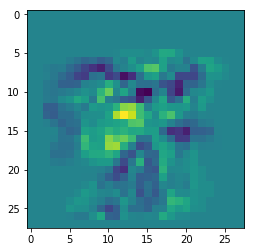

In [5]:
plt.imshow(w.reshape(28,28), interpolation=None)

In a few sentences, describe what you see, referencing which features are most important for making classification. Report any evidence of overfitting.

<font color='red'>**Write your answer here ...**</font> (as a *markdown* cell)

**Answer:**

The dark blue color resembles the most areas where the image for a 7 is rarely overlapping in an image for a 9. Vice versa the yellow areas show areas where the image for a 9 will typically be colored, but a 7 will not.
The stronger the color, the less prominent the opposite number is, i.e. the darker the blue, the rarer a 9 is colored in that area, the brighter the yellow, the less common a 7 is drawn in that area of the image.

Specifically the dark blue areas cover the crooked line often drawn in a 7, and the horizontal top line, where as the yellow areas represent the are where a the circular segment of a 9 is typically drawn. This translates to high weights in yellow areas to classify as a 9, and high weights in dark blue areas to classify as a 7

Split the data into training and heldout validation partitions by holding out a random 25% sample of the data. Evaluate the error over the course of a training run, and plot the training and validation error rates as a function of the number of passes over the training dataset.

<br />
<font color='red'>**Write your code in the cell below ...**</font>

(225, 784)
(225,)


C:\Users\TriXXeD\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


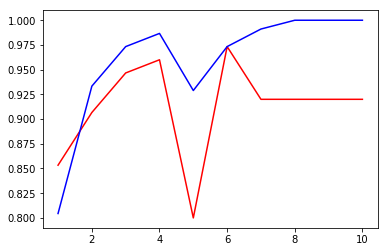

In [6]:
## your code here
#Splitting the data
import sklearn.cross_validation as cvalid
#refactor to model_selection

X_train, X_valid, y_train, y_valid = cvalid.train_test_split(
    X, y, test_size=0.25, random_state=1994)
y_train_arr = ravel(y_train)
y_valid_arr = ravel(y_valid)

#Running the numbers
accuracy_list_valid = [None]*10
accuracy_list_train = [None]*10
iteration_list = [None]*10

print(X_train.shape)
print(y_train_arr.shape)
for i in range(0, 10):
    clf.max_iter = i+1
    clf.fit(X_train, y_train_arr)
    accuracy_list_valid[i] = clf.score(X_valid, y_valid_arr)
    accuracy_list_train[i] = clf.score(X_train, y_train_arr)
    iteration_list[i] = i+1
    
error_list_valid = [1-x for x in accuracy_list_valid]
error_list_train = [1-x for x in accuracy_list_train]

#Plotting
import matplotlib.pyplot as plt
#plt.plot(iteration_list, error_list_valid, "r")
#plt.plot(iteration_list, error_list_train, "b")
plt.plot(iteration_list, accuracy_list_valid, "r")
plt.plot(iteration_list, accuracy_list_train, "b")



In a few sentences, describe the shape of the curves, and compare the two. Now consider if we were to stop training early, can you choose a point such that you get the best classification performance? Justify your choice.

<font color='red'>**Write your answer here ...**</font> (as a *markdown* cell)

**Answer**

The graphs show a spike down in accuracy at 5 runs, after that point the training data slightly increases in accuracy before converging, while the validation data converges quicker - this seems to indicate that post 5 runs is overfitting the data.

On the other hand, the graphs seem to show that less than 3 runs underfit the data, with 4 being the ideal number of runs. The dive at 5 runs I cannot explain. Different random seeds provide different graphs, in which all provide a slight spike in error, before converging - with this variance it's hard to determine the actual best  iteration count, but cross-validation would provide better data to base a choice on, as the seed would be less influential then.

Now that we have tried a simple approach, we are going to implement several non-linear approaches to our task. Note that we are still going to use a linear method (the perceptron), but combine this with a non-linear data transformation. We start with basis expansion.

### 1.2 Basis Expansion
Apply Radial Basis Function (RBF)-based transformation to the data, and fit a perceptron model. Recall that the RBF basis is defined as

$$\varphi_l(\mathbf{x}) =  \exp\left(-\frac{||\mathbf{x} - \mathbf{z}_l||^2}{\sigma^2}\right)$$

where $\mathbf{z}_l$ is centre of the $l^{th}$ RBF. We'll use $L$ RBFs, such that $\varphi(\mathbf{x})$ is a vector with $L$ elements. The spread parameter $\sigma$ will be the same for each RBF.

*Hint: You will need to choose the values for $\mathbf{z}_l$ and $\sigma$. If the input data were 1D, the centres $\mathbf{z}_l$ could be uniformly spaced on a line. However, here we have 784-dimensional input. For this reason you might want to use some of the training points as centres, e.g., $L$ randomly chosen "2"s and "7"s.*

<br />

<font color='red'>**Write your code in the cell below ...**</font>

In [74]:
##### your code here
import numpy as np

def RBF_create_centres(L, maxind, y):
    ####NOTE: If unfortunate one may get only 7's or only 9's on lower l-values
    np.random.seed(1997)
    z_index_list = np.random.randint(0, maxind, L)
    #print(z_index_list)
    z_list = [z_index_list[x] for x in range(L)]
    #print(len(z_list))
    return z_list

def RBFtransform(x, L, s, y):
    rbf_x = np.zeros([x.shape[0], L])
    ## Input
    #x = 784 dimensional vector
    #L = number of features to reduce to, i.e. number of centres
    #s = length scalar/ spread 
    ## Output
    #rbf_x = scalar. Should have L of these
    #phi(x) = vector of size L
    #Phi(x) = N*L = 300xL
    Z = RBF_create_centres(L, x.shape[0]-1, y)
    #print(len(Z))

    for i in range(len(Z)):
        numerator = np.linalg.norm(x - x[Z[i]], 2, 1)
        rbf_x[:,i] = np.exp(-(numerator/s**2))
        #print(Z[i])
    return rbf_x

#l_size = 10
#z_index_list = np.random.randint(0, 299, l_size)
#s = 0.1
#z_list = [z_index_list[x] for x in range(l_size)]
#rbf_data = RBFtransform(X, l_size, s)
#print(rbf_data)



Now compute the validation error for your RBF-perceptron and use this to choose good values of $L$ and $\sigma$. Show a plot of the effect of changing each of these parameters, and justify your parameter choice.

<br />

<font color='red'>**Write your code in the cell below ...**</font>

In [75]:
##### your code here
#Setup values
s_epochs = 50
l_epochs = 150
start_l = 1
start_s = 0.1
res_list = np.zeros([l_epochs, 3])
s_list = np.zeros([l_epochs, s_epochs])
clf = sklin.Perceptron(max_iter=4)

#Finding L and s
for i in range(l_epochs):
    print(i)
    l = (i+1)*start_l
    best_s = 0
    best_res = 0
    for j in range(s_epochs):
        s = (j+1)*start_s
        rbf_data = RBFtransform(X, l, s, y)
        #Splitting data
        rbf_X_train, rbf_X_valid, rbf_y_train, rbf_y_valid = cvalid.train_test_split(
        rbf_data, y, test_size=0.25, random_state=1994)
        rbf_y_train_arr = ravel(rbf_y_train)
        rbf_y_valid_arr = ravel(rbf_y_valid)
        #Running model on data
        clf.fit(rbf_X_train, rbf_y_train_arr)
        res = clf.score(rbf_X_valid, rbf_y_valid_arr)
        s_list[i, j] = res
        if(res > best_res):
            best_s = s
            best_res = res   
    #Storing Results
    res_list[i,0] = l
    res_list[i,1] = best_s
    res_list[i,2] = best_res

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


[[   1.            4.9           0.48      ]
 [   2.            4.8           0.58666667]
 [   3.            0.4           0.53333333]
 [   4.            3.7           0.82666667]
 [   5.            3.6           0.86666667]
 [   6.            3.1           0.81333333]
 [   7.            4.6           0.86666667]
 [   8.            2.1           0.88      ]
 [   9.            3.5           0.89333333]
 [  10.            3.5           0.89333333]
 [  11.            2.8           0.89333333]
 [  12.            2.7           0.90666667]
 [  13.            2.4           0.90666667]
 [  14.            3.            0.94666667]
 [  15.            2.9           0.96      ]
 [  16.            2.2           0.94666667]
 [  17.            2.9           0.96      ]
 [  18.            3.            0.96      ]
 [  19.            2.4           0.93333333]
 [  20.            2.9           0.93333333]
 [  21.            2.7           0.93333333]
 [  22.            2.6           0.93333333]
 [  23.   

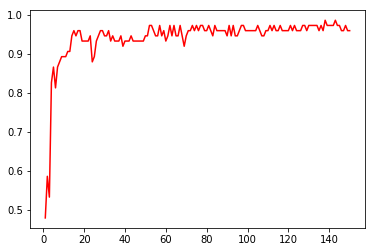

In [78]:
#Sort and print top 10 resulsts
#print(s_list.shape)
#print(s_list[145,:])
print(res_list)
#print(s_list)

plt.plot(res_list[:,0], res_list[:,2], "r")
#plt.plot(range(50), s_list[97,:], "b")



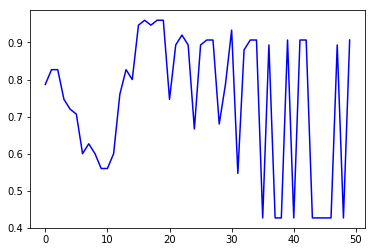

In [77]:
plt.plot(range(50), s_list[145,:], "b")

<font color='red'>**Write your justfication here ...**</font> (as a *markdown* cell)

**Answer**

The blue graph above shows the difference in sigma values for l=146, the x axes represents values from 0.1 to 5 with 0.1 increments written.
The red graph shows the difference in l values, given their most optimal sigma value.

From res_list we can see that several configurations give the same accuracy of 97.333 % (2nd highest achieved), which is achieved testing values for 1 - 150 l, each with 0.1 - 5 with increments of 0.1 for sigma.
The highest achieved value is 98.6667 % in the configuration run (random seed 1997).

The lowst l value to produce accuracy of 97.333 % was:

l = 52 , s = 2.6

The highest accuracy found is produced by:

l = 138, s = 1.6

l = 143, s = 1.8

It is possible that lower l's could be found if controlling the distribution between 7's and 9's chosen for as centres.
In the implementation they are chosen at random with not balancing, as such it makes sense that they balance out in higher l values and thus the higher l values perform consistently better than the lower l values.



### 1.3 Kernel Perceptron
Next, instead of directly computing a feature space transformation, we are going to use the kernel trick. Specifically, we are going to use the kernelised version of perceptron in combination with a few different kernels.

*In this section, you cannot use any libraries other than `numpy` and `matplotlib`.*

First, implement linear, polynomial and RBF kernels. The linear kernel is simply a dot product of its inputs, i.e., there is no feature space transformation. Polynomial and RBF kernels should be implemented as defined in the lecture slides.

<br />

<font color='red'>**Write your code in the cell below ...**</font>

In [8]:
# Input:
# u,v - column vectors of the same dimensionality
#
# Output:
# v - a scalar
def linear_kernel(u, v):
    return  np.dot(u, v)  

# Input:
# u,v - column vectors of the same dimensionality
# c,d - scalar parameters of the kernel as defined in lecture slides
#
# Output:
# v - a scalar
def polynomial_kernel(u, v, c=0, d=3):
    return (np.dot(u.T, v) + c)**d

# Input:
# u,v - column vectors of the same dimensionality
# gamma - scalar parameter of the kernel as defined in lecture slides
#
# Output:
# v - a scalar
def rbf_kernel(u, v, gamma=1):
    return np.exp(-gamma*(np.linalg.norm(u - v, 1, axis=None)))

Kernel perceptron was a "green slides" topic, and you will not be asked about this method in the exam. Here, you are only asked to implement a simple prediction function following the provided equation. In kernel perceptron, the prediction for instance $\mathbf{x}$ is made based on the sign of

$$w_0 + \sum_{i=1}^{n}\alpha_i y_i K(\mathbf{x}_i, \mathbf{x})$$

Here $w_0$ is the bias term, $n$ is the number of training examples, $\alpha_i$ are learned weights, $\mathbf{x}_i$ and $y_i$ is the training dataset,and $K$ is the kernel.

<br />

<font color='red'>**Write your code in the cell below ...**</font>

In [59]:
# Input:
# x_test - (r x m) matrix with instances for which to predict labels                         
# X - (n x m) matrix with training instances in rows
# y - (n x 1) vector with labels 
# alpha - (n x 1) vector with learned weigths
# bias - scalar bias term
# kernel - a kernel function that follows the same prototype as each of the three kernels defined above
#
# Output:
# y_pred - (r x 1) vector of predicted labels
def kernel_ptron_predict(x_test, X, y, alpha, bias, kernel):
    ###Giving size errors in his code from numpy bullshit
    y_pred = np.zeros([x_test.shape[0], 1])
    fucknumpy = x_test.shape[0]
    ###Numpy column vector annoyance
    if(len(x_test.shape)==1):
        y_pred = np.zeros([1, 1])
        fucknumpy = 1
        
    for r in range (fucknumpy):           #loops over number of predictions required
        sum_list = np.zeros([X.shape[0], 1])
        for n in range (X.shape[0]):      #loops over number of training samples           
            if(fucknumpy == 1):
                sum_list[n] = alpha[n] * y[n] * kernel(X[n,:], x_test[:])
            else:
                sum_list[n] = alpha[n] * y[n] * kernel(X[n,:], x_test[r])
        
        y_pred[r] = np.sign(bias + sum_list.sum())
    
    return y_pred

The code for kernel perceptron training is provided below. You can treat this function as a black box, but we encourage you to understand the implementation.

In [10]:
# Input:
# X - (n x m) matrix with training instances in rows
# y - (n x 1) vector with labels
# kernel - a kernel function that follows the same prototype as each of the three kernels defined above
# epochs - scalar, number of epochs
#
# Output:
# alpha - (n x 1) vector with learned weigths
# bias - scalar bias term
def kernel_ptron_train(X, y, kernel, epochs=100):
    n, m = X.shape
    alpha = np.zeros(n)
    bias = 0
    updates = None
    for epoch in range(epochs):
        print('epoch =', epoch, ', updates =', updates)
        updates = 0

        schedule = list(range(n))
        np.random.shuffle(schedule)
        for i in schedule:
            y_pred = kernel_ptron_predict(X[i], X, y, alpha, bias, kernel)
            
            if y_pred != y[i]:
                alpha[i] += 1
                bias += y[i]
                updates += 1

        if updates == 0:
            break
        
    return alpha, bias

Now use the above functions to train the perceptron. Use heldout validation, and compute the validation error for this method using each of the three kernels. Write a paragraph or two with analysis how the accuracy differs between the different kernels and choice of kernel parameters. Discuss the merits of a kernel approach versus direct basis expansion approach as was used in the previous section.

<br />

<font color='red'>**Write your code in the cell below ...**</font>

In [60]:
#Splitting data
X_valid_kernel = X[0:75, :]
y_valid_kernel = y[0:75]
X_train_kernel = X[75:300, :]
y_train_kernel = y[75:300]


#print(y_train_kernel.sum())
#ptron_lin_pred = kernel_ptron_predict(X_valid_kernel, X_train_kernel, y_train_kernel, np.zeros(X_train_kernel.shape[0]), 0, linear_kernel)
alpha_lin, bias_lin = kernel_ptron_train(X_train_kernel, y_train_kernel, linear_kernel)
alpha_poly, bias_poly = kernel_ptron_train(X_train_kernel, y_train_kernel, polynomial_kernel)
alpha_rbf, bias_rbf = kernel_ptron_train(X_train_kernel, y_train_kernel, rbf_kernel)

epoch = 0 , updates = None
epoch = 1 , updates = 32
epoch = 2 , updates = 12
epoch = 3 , updates = 17
epoch = 4 , updates = 3
epoch = 5 , updates = 5
epoch = 6 , updates = 8
epoch = 7 , updates = 4
epoch = 8 , updates = 3
epoch = 0 , updates = None
epoch = 1 , updates = 24
epoch = 2 , updates = 9
epoch = 3 , updates = 2
epoch = 0 , updates = None
epoch = 1 , updates = 30
epoch = 2 , updates = 18
epoch = 3 , updates = 6
epoch = 4 , updates = 12


In [61]:
lin_pred = kernel_ptron_predict(X_valid_kernel, X_train_kernel, y_train_kernel, alpha_lin, bias_lin, linear_kernel)
poly_pred = kernel_ptron_predict(X_valid_kernel, X_train_kernel, y_train_kernel, alpha_poly, bias_poly, polynomial_kernel)
rbf_pred = kernel_ptron_predict(X_valid_kernel, X_train_kernel, y_train_kernel, alpha_rbf, bias_rbf, rbf_kernel)

lin_corr = 0
poly_corr = 0
rbf_corr = 0
for i in range(75):
    if(lin_pred[i] == y_valid_kernel[i]):
        lin_corr += 1
    if(poly_pred[i] == y_valid_kernel[i]):
        poly_corr += 1
    if(rbf_pred[i] == y_valid_kernel[i]):
        rbf_corr += 1

print("Linear accuracy in % is:")
print((lin_corr/75)*100)
print("Polynomial accuracy in % is:")
print((poly_corr/75)*100)
print("RBF accuracy in % is:")
print((rbf_corr/75)*100)

Linear accuracy in % is:
93.33333333333333
Polynomial accuracy in % is:
90.66666666666666
RBF accuracy in % is:
94.66666666666667


<font color='red'>**Provide your analysis here ...**</font> (as a *markdown* cell)

**Answer**

Kernel methods converge, whereas the basis expansion method requires more rigoures testing to find good values. As the graphs also show the graphs vary a lot.
While the kernals still have some variables to tweak for better results, poly and rbf that is, the impact of not having the optimal value is less in the kernels than in the basis expansion.

### 1.4 Dimensionality Reduction
Yet another approach to working with complex data is to use a non-linear dimensionality reduction. To see how this might work, first apply a couple of dimensionality reduction methods and inspect the results.

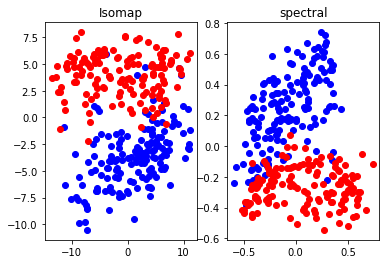

In [12]:
from sklearn import manifold

X = digits[:, 0:784]
y = np.squeeze(digits[:, 784:785])

# n_components refers to the number of dimensions after mapping
# n_neighbors is used for graph construction
X_iso = manifold.Isomap(n_neighbors=30, n_components=2).fit_transform(X)

# n_components refers to the number of dimensions after mapping
embedder = manifold.SpectralEmbedding(n_components=2, random_state=0)
X_se = embedder.fit_transform(X)

f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(X_iso[y==-1,0], X_iso[y==-1,1], "bo")
ax1.plot(X_iso[y==1,0], X_iso[y==1,1], "ro")
ax1.set_title('Isomap')
ax2.plot(X_se[y==-1,0], X_se[y==-1,1], "bo")
ax2.plot(X_se[y==1,0], X_se[y==1,1], "ro")
ax2.set_title('spectral')

In a few sentences, explain how a dimensionality reduction algorithm can be used for your binary classification task.

<font color='red'>**Write your answer here ...**</font> (as a *markdown* cell)

**Answer**

Dimensionality reduction can help us represent the same data in fewer features. For binary data in particular, DR can turn the data linearly seperable, which helps the classification algorithms.
Specifically for our data rather than having a single value per pixel, each value represents a cluster of pixels, as such outlying pixels, become less relevant whereas clusters more so.

In a more general aspect DR removes problems that arise from dealing with numerous dimensions, also known as curse of dimensionality.

Implement such an approach and assess the result. For simplicity, we will assume that both training and test data are available ahead of time, and thus the datasets should be used together for dimensionality reduction, after which you can split off a test set for measuring generalisation error. *Hint: you do not have to reduce number of dimensions to two. You are welcome to use the sklearn library for this question.*
 
<br />

<font color='red'>**Write your code in the cell below ...**</font>

In [57]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

X_pca_train, X_pca_val, y_pca_train, y_pca_val = cvalid.train_test_split(
    X, y, test_size=0.25, random_state=1994)

pca.fit(X_pca_train, y_pca_train)


clf_dr = sklin.Perceptron(max_iter=6)

y_pca_arr_val = ravel(y_pca_val)
y_pca_arr_train = ravel(y_pca_train)
clf_dr.fit(X_pca_train, y_pca_arr_train)


print("The error is: " + (str((1 - clf_dr.score(X_pca_val, y_pca_val))*100)) + "%")

The error is: 2.66666666667%


In a few sentences, comment on the merits of the dimensionality reduction based approach compared to linear classification from Section 1.1 and basis expansion from Section 1.2.

<font color='red'>**Write your answer here ...**</font> (as a *markdown* cell)

**Answer**

784 features, while a lot in certain domains, is not that many features when one considers the domain being an image, as such dimensionality reduction would not be my first choice in this context. Now if one considers full HD, that is 1920\*1080 pixels per image, then dimensionality reduction may be a good approach as to significantly reduce run-time without losing too too much information, and thereby accuracy.

## 2. Kaggle Competition
The final part of the project is a competition, on more challenging digit data sourced from natural scenes. This data is coloured, pixelated or otherwise blurry, and the digits are not perfectly centered. It is often difficult for humans to classify! The dataset is also considerably larger. 

Please sign up to the [COMP90051 Kaggle competition](https://inclass.kaggle.com/c/comp90051-2017) using your `student.unimelb.edu.au` email address. Then download the file `data.npz` from Kaggle. This is a compressed `numpy` data file containing three ndarray objects:
 - `train_X` training set, with 4096 input features (greyscale pixel values);
 - `train_Y` training labels (0-9)
 - `test_X` test set, with 4096 input features, as per above
 
Each image is 64x64 pixels in size, which has been flattened into a vector of 4096 values. You should load the files using `np.load`, from which you can extract the three elements. You may need to transpose the images for display, as they were flattened in a different order. Each pixel has an intensity value between 0-255. For those using languages other than python, you may need to output these objects in another format, e.g., as a matlab matrix.

Your job is to develop a *multiclass* classifier on this dataset. You can use whatever techniques you like, such as the perceptron code from above, or other methods such as *k*NN, logistic regression, neural networks, etc. You may want to compare several methods, or try an ensemble combination of systems. You are free to use any python libraries for this question. Note that some fancy machine learning algorithms can take several hours or days to train (we impose no time limits), so please start early to allow sufficient time. *Note that you may want to sample smaller training sets, if runtime is an issue, however this will degrade your accuracy. Sub-sampling is a sensible strategy when developing your code.*

You may also want to do some basic image processing, however, as this is not part of the subject, we would suggest that you focus most of your efforts on the machine learning. For inspiration, please see [Yan Lecun's MNIST page](http://yann.lecun.com/exdb/mnist/), specifically the table of results and the listed papers. Note that your dataset is harder than MNIST, so your mileage may vary.

### 2.1 Making Submissions

This will be setup as a *Kaggle in class* competition, in which you can upload your system predictions on the test set. You should format your predictions as a csv file, with the same number of lines as the test set, and each line comprising two numbers `id, class` where *id* is the instance number (increasing integers starting from 1) and *class* is an integer between 0-9, corresponding to your system prediction. E.g., 
```
Id,Label
1,9
2,9
3,4
4,5
5,1
...```
based on the first five predictions of the system being classes `9 9 4 5 1`. See the `sample_submission.csv` for an example file.

Kaggle will report your accuracy on a public portion of the test set, and maintain a leaderboard showing the performance of you and your classmates. You will be allowed to upload up to four submissions each day. At the end of the competition, you should nominate your best submission, which will be scored on the private portion of the test set. The accuracy of your system (i.e., proportion of correctly classified examples) on the private test set will be used for grading your approach.

**Marks will be assigned as follows**:
 - position in the class, where all students are ranked and then the ranks are linearly scaled to <br>0 marks (worst in class) - 4 marks (best in class) 
 - absolute performance (4 marks), banded as follows (rounded to nearest integer): 
 <br>below 80% = 0 marks; 80-89% = 1; 90-92% = 2; 93-94% = 3; above 95% = 4 marks

Note that you are required to submit your code with this notebook, submitted to the LMS. Failure to provide your implementation may result in assigning zero marks for the competition part, irrespective of the competition standing. Your implementation should be able to exactly reproduce submitted final Kaggle entry, and match your description below.

In [250]:
##Kaggle competetion Code
#Load Data
np.random.seed(1994)
import numpy as np
k_data = np.load('data.npz')
keys = k_data.keys()
print(keys)
k_train_X = k_data['train_X']
k_train_y = k_data['train_y']
k_test_X = k_data['test_X']


print(k_train_X.shape)
print(k_train_y.shape)
print(k_test_X.shape)

['train_X', 'train_y', 'test_X']
(35000, 4096)
(35000,)
(500, 4096)


In [ ]:
#load test y data
k_test_y = np.zeros([500,])
k_test_y[:,] = ([
    9,3,6,9,7,8,6,7,1,6,6,3,0,8,6,4,3,1,2,5,0,5,0,3,0,8,4,7,
    9,5,1,7,1,7,6,0,1,3,4,2,3,1,3,6,4,0,2,3,2,7,5,4,5,2,2,4,
    9,7,9,3,3,4,6,5,6,7,7,6,1,0,9,6,3,3,0,6,0,7,6,3,1,7,4,9,
    9,7,6,4,2,4,1,3,1,3,9,5,7,8,5,0,2,8,6,1,6,0,0,6,5,5,4,8,
    8,1,3,0,1,3,8,4,2,1,7,8,5,1,0,1,4,2,8,6,3,4,9,4,4,8,7,0,
    3,6,5,3,8,4,1,7,3,1,8,2,0,5,3,8,3,0,2,0,1,7,8,8,4,5,5,7,
    1,6,4,3,0,0,8,5,9,4,9,4,8,2,0,5,8,1,0,6,7,2,9,0,2,9,3,6,
    1,7,2,7,0,3,6,2,6,4,8,9,7,9,3,9,0,7,1,2,3,3,5,6,4,7,0,8,
    4,7,4,5,3,5,1,4,7,0,8,5,6,2,1,4,7,3,2,9,8,8,0,2,9,6,8,2,
    4,8,1,4,1,1,6,6,3,8,8,0,4,6,2,7,2,9,8,9,5,7,5,5,2,8,4,9,
    1,5,0,9,2,3,2,0,3,9,6,8,5,7,8,1,4,3,9,2,3,4,9,4,1,9,0,2,
    8,1,0,2,7,0,8,0,9,2,1,4,6,8,5,4,5,8,3,9,6,9,0,4,5,9,5,8,
    5,5,7,1,7,4,7,3,3,5,3,7,5,0,2,1,4,4,4,4,3,9,7,2,9,4,2,3,
    7,6,9,4,0,5,9,3,6,7,0,0,1,4,7,9,8,8,0,5,6,0,5,6,1,9,3,1,
    0,4,7,6,4,9,9,8,6,1,9,7,2,2,8,2,6,6,3,5,0,3,2,8,9,1,1,5,
    2,7,5,6,5,0,6,5,7,8,5,9,8,8,1,7,1,8,3,2,1,5,0,1,9,5,8,8,
    5,9,2,1,3,2,2,2,2,9,0,1,2,5,8,7,2,6,2,6,7,9,1,0,6,0,8,2,
    7,4,3,9,3,0,9,4,5,6,6,8,6,1,1,8,6,7,5,8,1,4,1,5
    ])


(500,)
[ 9.  3.  6.  9.  7.  8.  6.  7.  1.  6.]


In [252]:
#Preprocessing

#cnn prep
k_train_X = k_train_X.reshape(k_train_X.shape[0], 1, 64, 64).astype('float32')
k_test_X = k_test_X.reshape(k_test_X.shape[0], 1, 64, 64).astype('float32')

#normalize
n_train_X = k_train_X/255
n_test_X = k_test_X/255
#one hot encoding
from keras.utils import np_utils
n_train_y = np_utils.to_categorical(k_train_y)
n_test_y = np_utils.to_categorical(k_test_y)
num_classes = n_test_y.shape[1]


7.0
(35000, 10)
10
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


In [306]:
#Keras - Using Tensorflow backend
#Model setup
import keras
from keras import backend as K
K.set_image_dim_ordering('th')
#Model creation
def cnnModel():
    #Model layers and functions
    model = keras.models.Sequential()
    model.add(keras.layers.convolutional.Conv2D(30, (5, 5), input_shape=(1,64,64), activation='relu'))
    model.add(keras.layers.convolutional.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.convolutional.Conv2D(15, (3, 3), activation='relu'))
    model.add(keras.layers.convolutional.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(50, activation='relu'))
    model.add(keras.layers.Dense(num_classes, activation='softmax'))
    #Create model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [303]:
#Running model
np.random.seed(1994)
num_pixels = 64*64
firstCnnModel = cnnModel()
firstCnnModel.fit(n_train_X, n_train_y, 
          validation_data=(n_test_X, n_test_y), 
          epochs=10, batch_size=200, verbose=2)
firstCnnModel_pred = firstCnnModel.predict(n_test_X)
score = firstCnnModel.evaluate(n_test_X, n_test_y, verbose=2)
print("Error: %.2f%%" % (100-score[1]*100))

Train on 35000 samples, validate on 500 samples
Epoch 1/1
648s - loss: 0.7457 - acc: 0.7817 - val_loss: 0.3638 - val_acc: 0.8860
Error: 11.40%


In [299]:
#Reversing categorial data for submission
csv_file = np.zeros([500,2])
for i in range(firstCnnModel_pred.shape[0]):
    csv_file[i] = ([i+1, np.argmax(firstCnnModel_pred[i])])

#print(csv_file)
import pandas as pd
labels = (['Id', 'Label'])
csv_int = csv_file.astype(int)
handin = np.vstack([labels, csv_int])

df = pd.DataFrame(handin)
df.to_csv("pred1.csv", header=None, index=None, index_label=None)

(500, 10)
[  1.16782097e-07   1.69926887e-12   2.44168177e-06   1.01096612e-06
   8.29315436e-11   7.86093024e-10   1.54275759e-09   2.15265333e-13
   8.84582505e-07   9.99995589e-01]
9
[['Id' 'Label']
 ['1' '9']
 ['2' '3']
 ..., 
 ['498' '1']
 ['499' '1']
 ['500' '5']]
(501, 2)


In [308]:
#####CNN variable testing
def cnnOpt():
    #Model layers and functions
    model = keras.models.Sequential()
    model.add(keras.layers.convolutional.Conv2D(30, (5, 5), input_shape=(1,64,64), activation='relu'))
    model.add(keras.layers.convolutional.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.convolutional.Conv2D(15, (3, 3), activation='relu'))
    model.add(keras.layers.convolutional.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(0.1))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(50, activation='relu'))
    model.add(keras.layers.Dense(num_classes, activation='softmax'))
    #Create model
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

def cnnConv():
    #Model layers and functions
    model = keras.models.Sequential()
    model.add(keras.layers.convolutional.Conv2D(45, (7, 7), input_shape=(1,64,64), activation='relu'))
    model.add(keras.layers.convolutional.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.convolutional.Conv2D(30, (5, 5), activation='relu'))
    model.add(keras.layers.convolutional.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.convolutional.Conv2D(15, (3, 3), activation='relu'))
    model.add(keras.layers.convolutional.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(0.1))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(50, activation='relu'))
    model.add(keras.layers.Dense(num_classes, activation='softmax'))
    #Create model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def cnnDense():
    #Model layers and functions
    model = keras.models.Sequential()
    model.add(keras.layers.convolutional.Conv2D(30, (5, 5), input_shape=(1,64,64), activation='relu'))
    model.add(keras.layers.convolutional.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.convolutional.Conv2D(15, (3, 3), activation='relu'))
    model.add(keras.layers.convolutional.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(0.1))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(32, activation='relu'))
    model.add(keras.layers.Dense(num_classes, activation='softmax'))
    #Create model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def cnnDrop():
    #Model layers and functions
    model = keras.models.Sequential()
    model.add(keras.layers.convolutional.Conv2D(30, (5, 5), input_shape=(1,64,64), activation='relu'))
    model.add(keras.layers.convolutional.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.convolutional.Conv2D(15, (3, 3), activation='relu'))
    model.add(keras.layers.convolutional.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(0.30))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(50, activation='relu'))
    model.add(keras.layers.Dense(num_classes, activation='softmax'))
    #Create model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [311]:
###Factor Testing
#models
cnn_drop = cnnDrop()
cnn_dense = cnnDense()
cnn_conv = cnnConv()
cnn_opt = cnnOpt()
cnn_function = cnnFunction()

cnn_drop.fit(n_train_X, n_train_y, 
          validation_data=(n_test_X, n_test_y), 
          epochs=5, batch_size=200, verbose=2)
score = cnn_drop.evaluate(n_test_X, n_test_y, verbose=2)
print("Error: %.3f%%" % (100-score[1]*100))

cnn_opt.fit(n_train_X, n_train_y, 
          validation_data=(n_test_X, n_test_y), 
          epochs=5, batch_size=200, verbose=2)
score = cnn_opt.evaluate(n_test_X, n_test_y, verbose=2)
print("Error: %.3f%%" % (100-score[1]*100))

cnn_dense.fit(n_train_X, n_train_y, 
          validation_data=(n_test_X, n_test_y), 
          epochs=5, batch_size=200, verbose=2)
score = cnn_dense.evaluate(n_test_X, n_test_y, verbose=2)
print("Error: %.3f%%" % (100-score[1]*100))

cnn_conv.fit(n_train_X, n_train_y, 
          validation_data=(n_test_X, n_test_y), 
          epochs=5, batch_size=200, verbose=2)
score = cnn_conv.evaluate(n_test_X, n_test_y, verbose=2)
print("Error: %.3f%%" % (100-score[1]*100))

Train on 35000 samples, validate on 500 samples
Epoch 1/5
675s - loss: 0.8253 - acc: 0.7529 - val_loss: 0.3826 - val_acc: 0.8800
Epoch 2/5
679s - loss: 0.2735 - acc: 0.9214 - val_loss: 0.2498 - val_acc: 0.9300
Epoch 3/5
707s - loss: 0.1889 - acc: 0.9450 - val_loss: 0.2138 - val_acc: 0.9420
Epoch 4/5
632s - loss: 0.1484 - acc: 0.9573 - val_loss: 0.1865 - val_acc: 0.9480
Epoch 5/5
735s - loss: 0.1237 - acc: 0.9643 - val_loss: 0.1882 - val_acc: 0.9460
Error: 5.400%
Train on 35000 samples, validate on 500 samples
Epoch 1/5
622s - loss: 0.7184 - acc: 0.7803 - val_loss: 0.2879 - val_acc: 0.9200
Epoch 2/5
625s - loss: 0.2155 - acc: 0.9395 - val_loss: 0.2173 - val_acc: 0.9360
Epoch 3/5
622s - loss: 0.1436 - acc: 0.9591 - val_loss: 0.2002 - val_acc: 0.9420
Epoch 4/5
630s - loss: 0.1051 - acc: 0.9697 - val_loss: 0.1913 - val_acc: 0.9340
Epoch 5/5
620s - loss: 0.0818 - acc: 0.9761 - val_loss: 0.1638 - val_acc: 0.9580
Error: 4.200%
Train on 35000 samples, validate on 500 samples
Epoch 1/5
620s - l

In [312]:
#### Activation function tests
def cnnRelu():
    #Model layers and functions
    model = keras.models.Sequential()
    model.add(keras.layers.convolutional.Conv2D(30, (5, 5), input_shape=(1,64,64), activation='relu'))
    model.add(keras.layers.convolutional.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.convolutional.Conv2D(15, (3, 3), activation='relu'))
    model.add(keras.layers.convolutional.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(0.1))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(50, activation='relu'))
    model.add(keras.layers.Dense(num_classes, activation='softmax'))
    #Create model
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

def cnnSigmoid():
    #Model layers and functions
    model = keras.models.Sequential()
    model.add(keras.layers.convolutional.Conv2D(30, (5, 5), input_shape=(1,64,64), activation='sigmoid'))
    model.add(keras.layers.convolutional.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.convolutional.Conv2D(15, (3, 3), activation='sigmoid'))
    model.add(keras.layers.convolutional.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(0.1))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='sigmoid'))
    model.add(keras.layers.Dense(50, activation='sigmoid'))
    model.add(keras.layers.Dense(num_classes, activation='softmax'))
    #Create model
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

def cnnELU():
    #Model layers and functions
    model = keras.models.Sequential()
    model.add(keras.layers.convolutional.Conv2D(30, (5, 5), input_shape=(1,64,64), activation='elu'))
    model.add(keras.layers.convolutional.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.convolutional.Conv2D(15, (3, 3), activation='elu'))
    model.add(keras.layers.convolutional.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(0.1))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='elu'))
    model.add(keras.layers.Dense(50, activation='elu'))
    model.add(keras.layers.Dense(num_classes, activation='softmax'))
    #Create model
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

def cnnMix():
    #Model layers and functions
    model = keras.models.Sequential()
    model.add(keras.layers.convolutional.Conv2D(30, (5, 5), input_shape=(1,64,64), activation='elu'))
    model.add(keras.layers.convolutional.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.convolutional.Conv2D(15, (3, 3), activation='relu'))
    model.add(keras.layers.convolutional.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(0.1))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='sigmoid'))
    model.add(keras.layers.Dense(50, activation='relu'))
    model.add(keras.layers.Dense(num_classes, activation='softmax'))
    #Create model
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [314]:
### Running models
sigmoid = cnnSigmoid()
relu = cnnRelu()
elu = cnnELU()
mix = cnnMix()

relu.fit(n_train_X, n_train_y, 
          validation_data=(n_test_X, n_test_y), 
          epochs=6, batch_size=200, verbose=2)
score = relu.evaluate(n_test_X, n_test_y, verbose=2)
print("Error: %.3f%%" % (100-score[1]*100))

sigmoid.fit(n_train_X, n_train_y, 
          validation_data=(n_test_X, n_test_y), 
          epochs=6, batch_size=200, verbose=2)
score = sigmoid.evaluate(n_test_X, n_test_y, verbose=2)
print("Error: %.3f%%" % (100-score[1]*100))

elu.fit(n_train_X, n_train_y, 
          validation_data=(n_test_X, n_test_y), 
          epochs=6, batch_size=200, verbose=2)
score = elu.evaluate(n_test_X, n_test_y, verbose=2)
print("Error: %.3f%%" % (100-score[1]*100))

mix.fit(n_train_X, n_train_y, 
          validation_data=(n_test_X, n_test_y), 
          epochs=6, batch_size=200, verbose=2)
score = mix.evaluate(n_test_X, n_test_y, verbose=2)
print("Error: %.3f%%" % (100-score[1]*100))

Train on 35000 samples, validate on 500 samples
Epoch 1/6
683s - loss: 0.8224 - acc: 0.7451 - val_loss: 0.3643 - val_acc: 0.8780
Epoch 2/6
699s - loss: 0.2259 - acc: 0.9361 - val_loss: 0.2086 - val_acc: 0.9360
Epoch 3/6
855s - loss: 0.1490 - acc: 0.9577 - val_loss: 0.2464 - val_acc: 0.9260
Epoch 4/6
847s - loss: 0.1102 - acc: 0.9688 - val_loss: 0.1759 - val_acc: 0.9500
Epoch 5/6
850s - loss: 0.0863 - acc: 0.9757 - val_loss: 0.1717 - val_acc: 0.9580
Epoch 6/6
843s - loss: 0.0673 - acc: 0.9804 - val_loss: 0.1986 - val_acc: 0.9540
Error: 4.600%
Train on 35000 samples, validate on 500 samples
Epoch 1/6
724s - loss: 2.0310 - acc: 0.2986 - val_loss: 1.2966 - val_acc: 0.7280
Epoch 2/6
657s - loss: 0.9449 - acc: 0.7764 - val_loss: 0.7550 - val_acc: 0.7940
Epoch 3/6
802s - loss: 0.6569 - acc: 0.8259 - val_loss: 0.6108 - val_acc: 0.8240
Epoch 4/6
784s - loss: 0.5452 - acc: 0.8513 - val_loss: 0.5022 - val_acc: 0.8520
Epoch 5/6
788s - loss: 0.4689 - acc: 0.8704 - val_loss: 0.4857 - val_acc: 0.8500

In [318]:
#### Final CNN
np.random.seed(1994)
def cnnModelFinal():
    #Model layers and functions
    model = keras.models.Sequential()
    model.add(keras.layers.convolutional.Conv2D(45, (7, 7), input_shape=(1,64,64), activation='relu'))
    model.add(keras.layers.convolutional.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.convolutional.Conv2D(30, (5, 5), activation='relu'))
    model.add(keras.layers.convolutional.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.convolutional.Conv2D(15, (3, 3), activation='relu'))
    model.add(keras.layers.convolutional.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(50, activation='relu'))
    model.add(keras.layers.Dense(num_classes, activation='softmax'))
    #Create model
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [319]:
#the final run
cnnFinal = cnnModelFinal()

np.random.seed(1994)
cnnFinal.fit(n_train_X, n_train_y, 
          validation_data=(n_test_X, n_test_y), 
          epochs=15, batch_size=200, verbose=2)
score = cnnFinal.evaluate(n_test_X, n_test_y, verbose=2)
print("Error: %.3f%%" % (100-score[1]*100))


Train on 35000 samples, validate on 500 samples
Epoch 1/15
1459s - loss: 0.8586 - acc: 0.7235 - val_loss: 0.2903 - val_acc: 0.9060
Epoch 2/15
1476s - loss: 0.2711 - acc: 0.9224 - val_loss: 0.1844 - val_acc: 0.9460
Epoch 3/15
1478s - loss: 0.1869 - acc: 0.9470 - val_loss: 0.1550 - val_acc: 0.9480
Epoch 4/15
1477s - loss: 0.1496 - acc: 0.9578 - val_loss: 0.1456 - val_acc: 0.9560
Epoch 5/15
1489s - loss: 0.1275 - acc: 0.9633 - val_loss: 0.1525 - val_acc: 0.9560
Epoch 6/15
1487s - loss: 0.1129 - acc: 0.9679 - val_loss: 0.1324 - val_acc: 0.9640
Epoch 7/15
1238s - loss: 0.0999 - acc: 0.9712 - val_loss: 0.1241 - val_acc: 0.9660
Epoch 8/15
1084s - loss: 0.0941 - acc: 0.9727 - val_loss: 0.1299 - val_acc: 0.9660
Epoch 9/15
1102s - loss: 0.0819 - acc: 0.9764 - val_loss: 0.1244 - val_acc: 0.9640
Epoch 10/15
1107s - loss: 0.0735 - acc: 0.9783 - val_loss: 0.1352 - val_acc: 0.9660
Epoch 11/15
1112s - loss: 0.0703 - acc: 0.9800 - val_loss: 0.1097 - val_acc: 0.9720
Epoch 12/15
1115s - loss: 0.0654 - ac

In [321]:
final_pred = cnnFinal15.predict(n_test_X)

#Reversing categorial data for submission
csv_final = np.zeros([500,2])
for i in range(final_pred.shape[0]):
    csv_final[i] = ([i+1, np.argmax(final_pred[i])])

#print(csv_file)
labels = (['Id', 'Label'])
csv_final_int = csv_final.astype(int)
final_handin = np.vstack([labels, csv_final_int])

df = pd.DataFrame(final_handin)
df.to_csv("final_prediction.csv", header=None, index=None, index_label=None)

### 2.2. Method Description
Describe your approach, and justify each of the choices made within your approach. You should write a document with no more than 400 words, as a **PDF** file (not *docx* etc) with up to 2 pages of A4 (2 sides). Text must only appear on the first page, while the second page is for *figures and tables only*. Please use a font size of 11pt or higher. Please consider using `pdflatex` for the report, as it's considerably better for this purpose than wysiwyg document editors. You are encouraged to include empirical results, e.g., a table of results, graphs, or other figures to support your argument. *(this will contribute 9 marks; note that we are looking for clear presentation, sound reasoning, good evaluation and error analysis, as well as general ambition of approach.)*